In [38]:
# imports
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

In [5]:
# figuring out what this data looks like
chunk_size = 1000
csv_file = './data/tracking_week_1.csv'

for chunk in pd.read_csv(csv_file, chunksize=chunk_size): 
    print(chunk.head())

       gameId  playId    nflId     displayName  frameId  \
0  2022090800      56  35472.0  Rodger Saffold        1   
1  2022090800      56  35472.0  Rodger Saffold        2   
2  2022090800      56  35472.0  Rodger Saffold        3   
3  2022090800      56  35472.0  Rodger Saffold        4   
4  2022090800      56  35472.0  Rodger Saffold        5   

                         time  jerseyNumber club playDirection      x      y  \
0  2022-09-08 20:24:05.200000          76.0  BUF          left  88.37  27.27   
1  2022-09-08 20:24:05.299999          76.0  BUF          left  88.47  27.13   
2  2022-09-08 20:24:05.400000          76.0  BUF          left  88.56  27.01   
3  2022-09-08 20:24:05.500000          76.0  BUF          left  88.64  26.90   
4  2022-09-08 20:24:05.599999          76.0  BUF          left  88.72  26.80   

      s     a   dis       o     dir         event  
0  1.62  1.15  0.16  231.74  147.90           NaN  
1  1.67  0.61  0.17  230.98  148.53  pass_arrived  
2  1.57 

KeyboardInterrupt: 

In [18]:
def load_game_data(file_path: str, game_id: int, chunk_size:int = 10000)->pd.DataFrame:
    """
    Load rows from a CSV file that match a specific gameID

    Args: 
    file_path (str): Path to the CSV file
    game_id (int): the gameID to filter by
    chunk_size (int, optional): the number of rows per chunk, default 10000

    Returns:
    pd.DataFrame: a DataFrame containing rows with the specified gameID
    """

    data = pd.DataFrame()
    # stream data in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunk_size): 
        filtered_chunk = chunk[chunk['gameId'] == game_id]
        # when no more matches, don't parse the rest of the file
        if filtered_chunk.shape[0] == 0: 
            break
        data = pd.concat([data, filtered_chunk], ignore_index=True)

    return data


In [25]:
def organize_game_data(df):
    """
    Organize game data into a nested dictionary structure.

    Args:
    df (pd.DataFrame): The DataFrame containing game data.

    Returns:
    dict: A nested dictionary with plays as keys and dictionaries of data where the key is the frame and the values are data from that frame
    """

    # Initialize the main dictionary
    game_dict = {}

    # Iterate over each unique play in the DataFrame
    for play_id in df['playId'].unique():
        play_df = df[df['playId'] == play_id]

        # Initialize the play's dictionary
        play_dict = {}

        # Iterate over each player in the play
        for frame_id in play_df['frameId'].unique():
            frame_df = play_df[play_df['frameId'] == frame_id]

            # Select and sort relevant columns
            columns = ['nflId', 'time', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event']
            frame_df = frame_df[columns]

            # Add the player's DataFrame to the play's dictionary
            play_dict[frame_id] = frame_df

        # Add the play's dictionary to the main dictionary
        game_dict[play_id] = play_dict

    return game_dict

In [33]:
game_data = load_game_data(csv_file, 2022090800)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN
5,2022090800,56,35472.0,Rodger Saffold,6,2022-09-08 20:24:05.700000,76.0,BUF,left,88.80,26.70,1.15,1.42,0.12,234.48,139.41,pass_outcome_caught
6,2022090800,56,35472.0,Rodger Saffold,7,2022-09-08 20:24:05.799999,76.0,BUF,left,88.87,26.64,0.93,1.69,0.09,235.77,134.32,NaN
7,2022090800,56,35472.0,Rodger Saffold,8,2022-09-08 20:24:05.900000,76.0,BUF,left,88.91,26.59,0.68,1.74,0.07,240.00,131.01,NaN
8,2022090800,56,35472.0,Rodger Saffold,9,2022-09-08 20:24:06.000000,76.0,BUF,left,88.94,26.57,0.42,1.74,0.04,243.56,122.29,NaN
9,2022090800,56,35472.0,Rodger Saffold,10,2022-09-08 20:24:06.099999,76.0,BUF,left,88.95,26.58,0.14,1.83,0.01,246.07,85.87,NaN


In [34]:
game_data_organized = organize_game_data(game_data)

       nflId                        time playDirection          x      y  \
2    35472.0  2022-09-08 20:24:05.400000          left  88.560000  27.01   
24   38577.0  2022-09-08 20:24:05.400000          left  78.160000  27.88   
46   41239.0  2022-09-08 20:24:05.400000          left  91.620000  30.98   
68   42392.0  2022-09-08 20:24:05.400000          left  88.270000  28.92   
90   42489.0  2022-09-08 20:24:05.400000          left  80.340000  37.09   
112  42816.0  2022-09-08 20:24:05.400000          left  71.550000   7.67   
134  43294.0  2022-09-08 20:24:05.400000          left  78.060000  39.63   
156  43298.0  2022-09-08 20:24:05.400000          left  92.150000  33.52   
178  43335.0  2022-09-08 20:24:05.400000          left  88.570000  25.59   
200  44875.0  2022-09-08 20:24:05.400000          left  89.690000  25.96   
222  44985.0  2022-09-08 20:24:05.400000          left  76.070000  17.70   
244  46076.0  2022-09-08 20:24:05.400000          left  90.730000  30.02   
266  47844.0

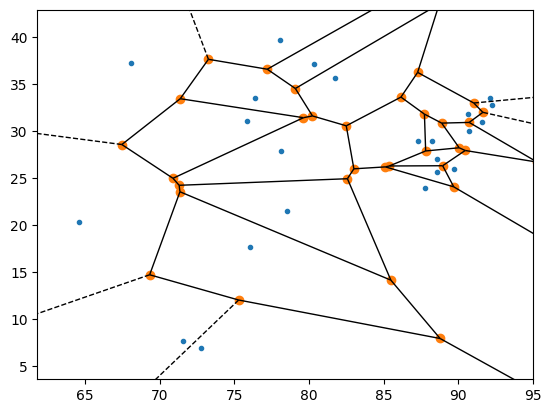

In [46]:
# voronoi tesselation
test_frame = game_data_organized[56][3]
points = np.column_stack([test_frame['x'].to_numpy(), test_frame['y'].to_numpy()])
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
plt.show()
    